Model Training

Importing required libraries

In [4]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [6]:
df=pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#Creating x and y

X=df.drop(columns=['math_score'],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [8]:
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [9]:
#Create column transofrmer with 3 types of transformers

num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)
#tranforming dta

X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [11]:
#An Evaluate function to give all metrics after model training
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [12]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "SVR":SVR(),
    "XGBRegressor":XGBRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):

    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("Model Performance on Train set")
    print("MAE: ",model_train_mae)
    print("RMSE: ",model_train_rmse)
    print("R2_Score: ",model_train_r2)
    print("Model Performance on Test set")
    print("MAE: ",model_test_mae)
    print("RMSE: ",model_test_rmse)
    print("R2_Score: ",model_test_r2)
    r2_list.append(model_test_r2)

    print("-"*50)
    print('\n')


LinearRegression
Model Performance on Train set
MAE:  4.266711846071957
RMSE:  5.323050852720513
R2_Score:  0.8743172040139593
Model Performance on Test set
MAE:  4.21476314247485
RMSE:  5.393993869732842
R2_Score:  0.8804332983749565
--------------------------------------------------


Ridge
Model Performance on Train set
MAE:  4.264987823725981
RMSE:  5.323324922741654
R2_Score:  0.8743042615212909
Model Performance on Test set
MAE:  4.21110068801426
RMSE:  5.390387016935638
R2_Score:  0.8805931485028738
--------------------------------------------------


Lasso
Model Performance on Train set
MAE:  5.206302661246526
RMSE:  6.593815587795565
R2_Score:  0.8071462015863458
Model Performance on Test set
MAE:  5.157881810347763
RMSE:  6.519694535667419
R2_Score:  0.8253197323627853
--------------------------------------------------


KNeighborsRegressor
Model Performance on Train set
MAE:  4.51675
RMSE:  5.707884897227694
R2_Score:  0.8554876322327585
Model Performance on Test set
MAE:  5

In [13]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by='R2_Score',ascending=False).reset_index(drop=True)

,Model Name,R2_Score
0,Ridge,0.880593
1,LinearRegression,0.880433
2,RandomForestRegressor,0.851990
3,AdaBoostRegressor,0.843159
4,XGBRegressor,0.827797
5,Lasso,0.825320
6,KNeighborsRegressor,0.783813
7,DecisionTreeRegressor,0.747142
8,SVR,0.728600


In [14]:
#Linear Model has better performance than other models
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)
print("R2_Score: ",score*100)

R2_Score:  88.04332983749565


Text(0, 0.5, 'Predictions')

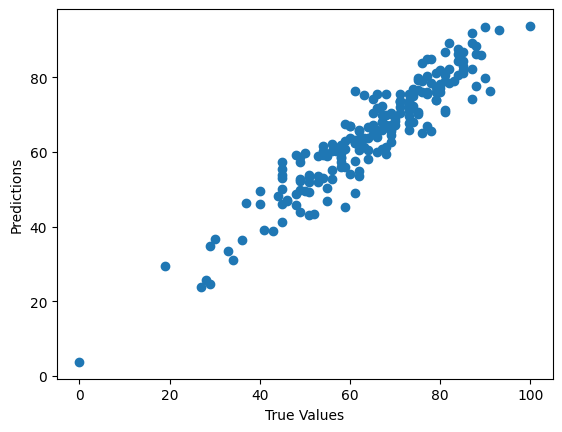

In [15]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [16]:
difference=pd.DataFrame({'True Values':y_test,'Predictions':y_pred,'Difference':y_test-y_pred})
difference

,True Values,Predictions,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
